In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def distance(D,rr,pt):
    D1 = D.copy()
    D1['dist'] = 0
    for i in range(len(pt)):
        D1['dist'] += (D1[D1.columns[i]] - pt[i])**2
    D2 = D1[D1['dist']<=rr]
    return D2

def DBSCAN(D, rr, Minpts):
    c=-1
    D1 = D.copy()
    D1['visit'] = 0
    D1['cls'] = -1
    n = len(D1)
    while len(D1[D1['visit'] == 0]) > 0: 
        k = np.random.randint(n)
        if D1.loc[D1.index[k],'visit'] == 0:
            D1.loc[D1.index[k],'visit'] = 1
        else:
            continue
            
        if len(distance(D1, rr, D1.loc[df.index[k]])) >= Minpts:
            c += 1
            D1.loc[D1.index[k],'cls'] = c
            N = distance(D1, rr, D1.loc[D1.index[k]])
            
            for i in N.index:
                if D1.loc[D1.index[i], 'visit'] == 0:
                    D1.loc[D1.index[i], 'visit'] = 1
                    if len(distance(D1, rr, D1.loc[D1.index[i]])) >= Minpts:
                        for j in distance(D1, rr, D1.loc[D1.index[i]]).index:
                            N.append(D1.loc[D1.index[j]])
                    if  D1.loc[D1.index[i], 'cls'] == -1:
                           D1.loc[D1.index[i], 'cls'] = c
    return D1
def plot_class(df, cls_name='cls'):
    marker = itertools.cycle(('ovspP*H+3XD>')) 
    cls_values = df[cls_name].unique()
    cls_values.sort()
    for item in cls_values:
        plt.scatter(df[df[cls_name]==item].x, df[df[cls_name]==item].y, label=item, marker=next(marker))
    plt.axis('equal')
    plt.legend()

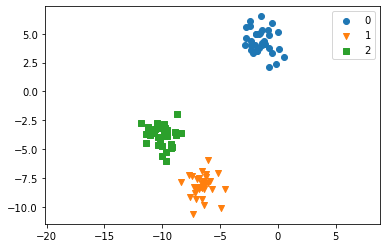

In [44]:
df = pd.read_csv('datasets/Muller_p169.csv')
df1 = DBSCAN(df,20,3)
plot_class(df1)